In [1]:
!pip install pandas



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install pandas



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Pandas adalah pustaka Python yang sangat populer untuk manipulasi data dan analisis data. Pustaka ini menyediakan struktur data yang fleksibel dan efisien untuk bekerja dengan data berbentuk tabel (seperti spreadsheet atau database) menggunakan DataFrame dan Series.

In [2]:
import pandas as pd
import numpy as np 

pandas : Perintah ini mengimpor pustaka pandas ke dalam program Python dan menetapkan alias pd untuk digunakan sebagai referensi singkat.

numpy : Perintah ini mengimpor pustaka NumPy ke dalam program Python dan menetapkan alias np untuk digunakan sebagai referensi singkat.

DATA LOADING

In [3]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.sample()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
91066,Female,24.0,0,0,never,21.38,6.6,159,0


DATA CLEANING

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
print("\nJumlah Data Hilang per Kolom:\n", df.isnull().sum()) 


Jumlah Data Hilang per Kolom:
 gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [6]:
print("\nBaris Terduplikat:\n", df[df.duplicated()])


Baris Terduplikat:
        gender   age  hypertension  heart_disease smoking_history    bmi  \
2756     Male  80.0             0              0         No Info  27.32   
3272   Female  80.0             0              0         No Info  27.32   
3418   Female  19.0             0              0         No Info  27.32   
3939   Female  78.0             1              0          former  27.32   
3960     Male  47.0             0              0         No Info  27.32   
...       ...   ...           ...            ...             ...    ...   
99980  Female  52.0             0              0           never  27.32   
99985    Male  25.0             0              0         No Info  27.32   
99989  Female  26.0             0              0         No Info  27.32   
99990    Male  39.0             0              0         No Info  27.32   
99995  Female  80.0             0              0         No Info  27.32   

       HbA1c_level  blood_glucose_level  diabetes  
2756           6.6        

In [31]:
numerical = []
catgcols = []

for col in df.columns:
    if df[col].dtype == "float64":  # Numerikal kontinu
        numerical.append(col)
    elif df[col].dtype == "int64" and col not in ['bmi', 'HbA1c_level']:  # Integer tertentu dianggap numerikal
        numerical.append(col)
    else:  # Selain itu dianggap kategorikal
        catgcols.append(col)
for col in df.columns:
    if col in numerical:  # Untuk numerikal
        df[col].fillna(df[col].median(), inplace=True)
    else:  # Untuk kategorikal
        df[col].fillna(df[col].mode()[0], inplace=True)



C:\Users\Acer\AppData\Local\Temp\ipykernel_23396\3131694370.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Acer\AppData\Local\Temp\ipykernel_23396\3131694370.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [8]:
numerical

['age',
 'hypertension',
 'heart_disease',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level',
 'diabetes']

In [9]:
catgcols

['gender', 'smoking_history']

In [10]:
df['diabetes'].value_counts()


diabetes
0    91500
1     8500
Name: count, dtype: int64

In [11]:
fitur = [col for col in df.columns if col != 'diabetes']
target = 'diabetes'

In [12]:
df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [14]:
df[fitur].value_counts()

gender  age    hypertension  heart_disease  smoking_history  bmi    HbA1c_level  blood_glucose_level
Female  80.00  0             0              No Info          27.32  6.5          159                    10
                                                                    6.2          90                      9
                                                                    4.0          85                      8
                                                                    4.5          140                     7
                                                                    4.0          160                     7
                                                                                                        ..
Male    80.00  1             1              not current      29.30  5.8          100                     1
                                                             34.24  6.2          140                     1
                                           

In [13]:
from sklearn.preprocessing import LabelEncoder

In [80]:
le = LabelEncoder()
for col in catgcols:
    df[col] = le.fit_transform(df[col])

df['diabetes'] = le.fit_transform(df['diabetes'])

EDA

In [79]:
x = df[fitur]
y = df[target]

print(x.dtypes)

gender                   int64
age                    float64
hypertension             int64
heart_disease            int64
smoking_history          int64
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
dtype: object


In [81]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [82]:
df.to_csv('diabetes_clean.csv')

In [83]:
!pip install imbalanced-learn



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


SMOTE (Synthetic Minority Over-sampling Technique) adalah teknik dalam imbalanced-learn library untuk mengatasi masalah dataset yang tidak seimbang. Oversampling (Over-sampling) adalah teknik untuk meningkatkan jumlah sampel dari kelas minor

Matplotlib merupakan sebuah library Python yang reliable dan komprehensif untuk mendukung kebutuhan pembuatan visualisasi data.

Seaborn adalah pustaka visualisasi data berbasis Matplotlib, tetapi dengan tampilan yang lebih menarik dan fungsi tingkat tinggi.


<Axes: xlabel='diabetes', ylabel='Count'>

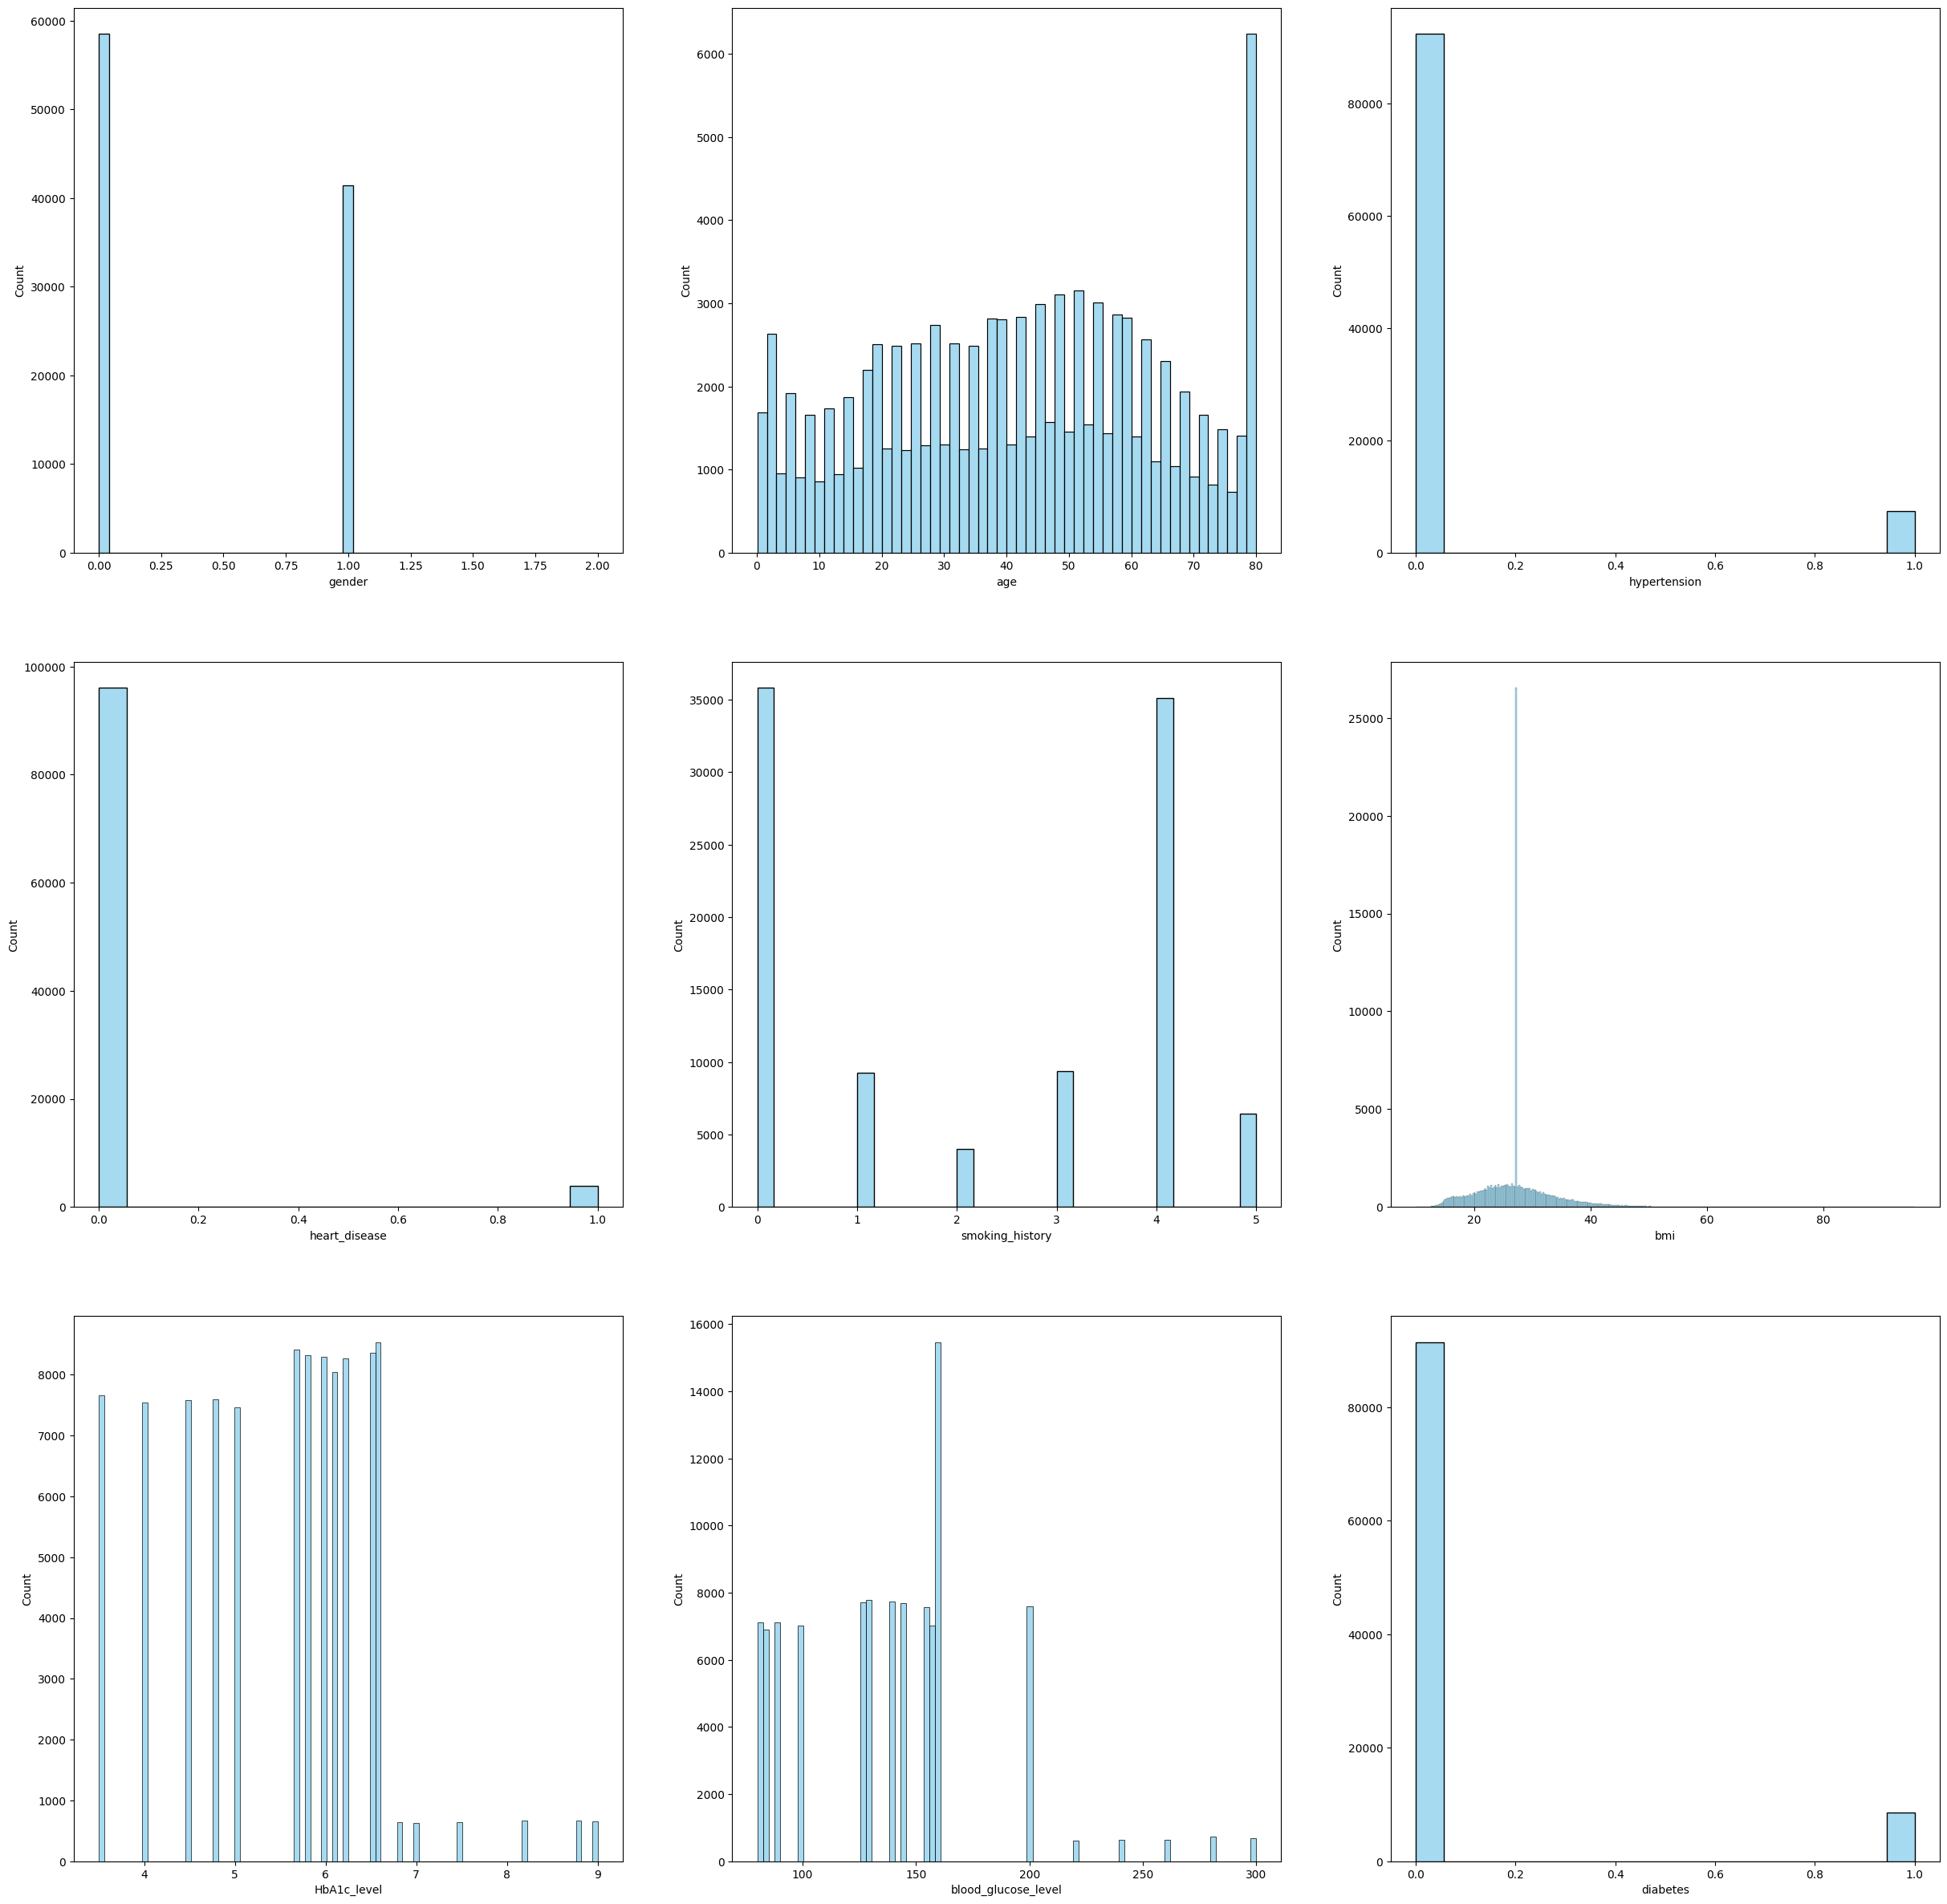

In [84]:

fig, axes = plt.subplots(3, 3, figsize=(30, 30 ))  # Ukuran lebih besar untuk tampilan vertikal


sns.histplot(data=df, x='gender', ax=axes[0, 0], color='skyblue')
sns.histplot(data=df, x='age', ax=axes[0, 1], color='skyblue')
sns.histplot(data=df, x='hypertension', ax=axes[0, 2], color='skyblue')
sns.histplot(data=df, x='heart_disease', ax=axes[1, 0], color='skyblue')
sns.histplot(data=df, x='smoking_history', ax=axes[1, 1], color='skyblue')
sns.histplot(data=df, x='bmi', ax=axes[1, 2], color='skyblue')
sns.histplot(data=df, x='HbA1c_level', ax=axes[2, 0], color='skyblue')
sns.histplot(data=df, x='blood_glucose_level', ax=axes[2, 1], color='skyblue')
sns.histplot(data=df, x='diabetes', ax=axes[2, 2], color='skyblue')

In [85]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns


# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Terapkan SMOTE untuk oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Periksa distribusi kelas setelah SMOTE
print("Distribusi kelas setelah SMOTE:", Counter(y_train_resampled))


Distribusi kelas setelah SMOTE: Counter({0: 64047, 1: 64047})


In [97]:
print(X_train_resampled.shape)
print(y_train_resampled.shape)

(128094, 8)
(128094,)


<function matplotlib.pyplot.show(close=None, block=None)>

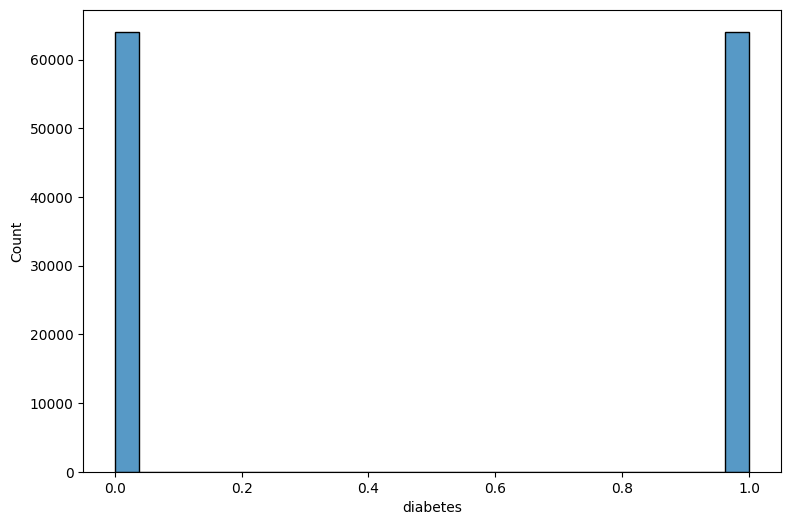

In [98]:
fig = plt.subplots(figsize=(9,6))
sns.histplot(data=y_train_resampled )
plt.show

DATA SPLITTING

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

DATA MODEL (RANDOM FOREST)

In [100]:
rfc = RandomForestClassifier(
    n_estimators=100,            # Jumlah pohon yang digunakan, biasanya lebih besar dari Decision Tree
    criterion='entropy',         # Kriteria pemisahan, setara dengan Decision Tree
    max_depth=None,                 # Kedalaman maksimum pohon
    max_features='sqrt',           # Menggunakan semua fitur untuk setiap pohon
    max_leaf_nodes=None,         # Tidak ada pembatasan pada jumlah daun
    min_samples_split=2,         # Sama dengan DTC, minimum sampel untuk membagi pohon
    min_samples_leaf=1,          # Sama dengan DTC, minimum sampel di setiap daun
    random_state=42,             # Random state untuk memastikan hasil yang konsisten
)

In [101]:
rfc.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(criterion='entropy', random_state=42)

In [102]:
y_pred = rfc.predict(X_test)

In [103]:
cm = [[0, 0], [0, 0]]  # Inisialisasi matriks 2x2
for true, pred in zip(y_test, y_pred):
    if true == 0 and pred == 0:
        cm[0][0] += 1  # True Negative
    elif true == 0 and pred == 1:
        cm[0][1] += 1  # False Positive
    elif true == 1 and pred == 0:
        cm[1][0] += 1  # False Negative
    elif true == 1 and pred == 1:
        cm[1][1] += 1  # True Positive

tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]

# 5. Hitung metrik evaluasi manual
accuracy = (tp + tn) / (tp + tn + fp + fn)  # Tidak ada pengecekan jika pembagi adalah 0
recall = tp / (tp + fn)  # Bisa menghasilkan error jika (tp + fn) = 0
specificity = tn / (tn + fp)  # Bisa menghasilkan error jika (tn + fp) = 0
precision = tp / (tp + fp)  # Bisa menghasilkan error jika (tp + fp) = 0
f1_score = 2 * (precision * recall) / (precision + recall)  

# 6. Cetak hasil
print("Confusion Matrix:")
print(f"[[{tn} {fp}]")
print(f" [{fn} {tp}]]")
print(f"Accuracy    : {accuracy * 100:.2f}%")
print(f"Recall      : {recall * 100:.2f}%")
print(f"Specificity : {specificity * 100:.2f}%")
print(f"Precision   : {precision * 100:.2f}%")
print(f"F1-Score    : {f1_score * 100:.2f}%")


Confusion Matrix:
[[26879 574]
 [664 1883]]
Accuracy    : 95.87%
Recall      : 73.93%
Specificity : 97.91%
Precision   : 76.64%
F1-Score    : 75.26%


In [105]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Probabilitas prediksi (dari model.predict_proba())
y_probs = rfc.predict_proba(X_test)[:, 1]  # Hanya probabilitas kelas positif
y_true = y_test  # Label asli

# Coba beberapa threshold
thresholds = np.arange(0.1, 1.0, 0.1)
for threshold in thresholds:
    y_pred = (y_probs >= threshold).astype(int)  # Ubah probabilitas jadi label berdasarkan threshold
    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f"Threshold: {threshold:.1f}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Accuracy: {accuracy:.2%}, Precision: {precision:.2%}, Recall: {recall:.2%}, F1-Score: {f1:.2%}")
    print("-" * 50)


Threshold: 0.1
Confusion Matrix:
[[23092  4361]
 [  133  2414]]
Accuracy: 85.02%, Precision: 35.63%, Recall: 94.78%, F1-Score: 51.79%
--------------------------------------------------
Threshold: 0.2
Confusion Matrix:
[[24684  2769]
 [  290  2257]]
Accuracy: 89.80%, Precision: 44.91%, Recall: 88.61%, F1-Score: 59.61%
--------------------------------------------------
Threshold: 0.3
Confusion Matrix:
[[25764  1689]
 [  430  2117]]
Accuracy: 92.94%, Precision: 55.62%, Recall: 83.12%, F1-Score: 66.65%
--------------------------------------------------
Threshold: 0.4
Confusion Matrix:
[[26353  1100]
 [  541  2006]]
Accuracy: 94.53%, Precision: 64.58%, Recall: 78.76%, F1-Score: 70.97%
--------------------------------------------------
Threshold: 0.5
Confusion Matrix:
[[26844   609]
 [  653  1894]]
Accuracy: 95.79%, Precision: 75.67%, Recall: 74.36%, F1-Score: 75.01%
--------------------------------------------------
Threshold: 0.6
Confusion Matrix:
[[27130   323]
 [  737  1810]]
Accuracy: 9

DEPLOYMENT

In [147]:
import pickle

In [156]:
pickle.dump(rfc, open("rfc_.pkl", "wb"))

In [97]:
import pandas as pd

# Mengambil pentingnya fitur dari model
importances = rfc.feature_importances_

# Menyimpan nama fitur (misalnya, nama kolom data pelatihan Anda) dan pentingnya fitur
feature_names = ['gender', 'umur', 'hipertensi', 'penyakit_jantung', 'riwayat_merokok', 'bmi', 'hba1c', 'gula_darah']
feature_data = {'Feature': feature_names, 'Importance': importances}

# Membuat DataFrame dan menyimpannya sebagai CSV
df = pd.DataFrame(feature_data)
df.to_csv("feature_importances.csv", index=False)

In [98]:
# Import library
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Asumsikan X_sample dan y_sample sudah terdefinisi sebelumnya
# Contoh data: 
# X_sample = ... # fitur data
# y_sample = ... # label target

# 1. Split data menjadi training dan testing
x_train, x_test, y_train, y_test = train_test_split(x_sampl, y_sampl, test_size=0.2, random_state=42)

# 2. Buat model Decision Tree
model = DecisionTreeClassifier(criterion="gini",max_depth=12,min_samples_split=2, max_features="sqrt",splitter="best",random_state=42)

# 3. Latih model
model.fit(x_train, y_train)

# 4. Prediksi hasil
y_pred = model.predict(x_test)

# 5. Hitung Confusion Matrix (menggunakan class 0 sebagai contoh untuk binary metrics)
tn, fp, fn, tp = confusion_matrix((y_test).astype(int), (y_pred).astype(int)).ravel()

# 6. Hitung metrik evaluasi manual
accuracy = (tp + tn) / (tp + tn + fp + fn)  # Tidak ada pengecekan jika pembagi adalah 0
recall = tp / (tp + fn)  # Bisa menghasilkan error jika (tp + fn) = 0
specificity = tn / (tn + fp)  # Bisa menghasilkan error jika (tn + fp) = 0
precision = tp / (tp + fp)  # Bisa menghasilkan error jika (tp + fp) = 0
f1_score = 2 * (precision * recall) / (precision + recall)  

# 7. Cetak hasil dalam persentase
print("Confusion Matrix:")
print(f"[[{tn} {fp}]")
print(f" [{fn} {tp}]]")
print(f"Accuracy    : {accuracy * 100:.2f}%")
print(f"Recall      : {recall * 100:.2f}%")
print(f"Specificity : {specificity * 100:.2f}%")
print(f"Precision   : {precision * 100:.2f}%")
print(f"F1-Score    : {f1_score * 100:.2f}%")


Confusion Matrix:
[[16468 1825]
 [1350 16957]]
Accuracy    : 91.33%
Recall      : 92.63%
Specificity : 90.02%
Precision   : 90.28%
F1-Score    : 91.44%


In [158]:
import pickle
import pandas as pd

# Memuat model yang sudah disimpan
with open('rfc_.pkl', 'rb') as file:
    model = pickle.load(file)


def predict_from_data():
    try:
        # Data yang sudah disiapkan untuk prediksi
        data_baris_pertama = [0, 44.0, 0, 0, 4, 19.31, 6.5, 500]  # Data contoh

        # Menyiapkan data untuk prediksi
        fitur_nama = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']
        model_input = pd.DataFrame([data_baris_pertama], columns=fitur_nama)

        # Debugging input
        print("Data input untuk prediksi:", model_input)

        # Prediksi dengan model
        prediction = model.predict(model_input)
        probabilities = model.predict_proba(model_input)

        # Debugging output
        print("Hasil prediksi dari model:", prediction)
        print("Probabilitas prediksi:", probabilities)

        # Menampilkan hasil prediksi
        if prediction == 1:
            print("Prediksi: Terkena Diabetes")
        else:
            print("Prediksi: Tidak Terkena Diabetes")

    except Exception as e:
        print(f"Terjadi kesalahan: {e}")

# Memanggil fungsi untuk prediksi dengan data yang sudah ada
predict_from_data()

  



Data input untuk prediksi:    gender   age  hypertension  heart_disease  smoking_history    bmi  \
0       0  44.0             0              0                4  19.31   

   HbA1c_level  blood_glucose_level  
0          6.5                  500  
Hasil prediksi dari model: [1]
Probabilitas prediksi: [[0. 1.]]
Prediksi: Terkena Diabetes


In [101]:
print(model.predict(X_train[:5]))
print(y_train[:5])


[1 1 0 0 1]
140081    1
118592    1
72054     0
2657      0
38473     0
Name: diabetes, dtype: int64


In [86]:
print(dir(rfc))  # Daftar atribut dalam objek model
 # Pastikan bentuk data input sama dengan data yang digunakan untuk melatih model


['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_build_request_for_signature', '_check_feature_names', '_check_n_features', '_compute_oob_predictions', '_doc_link_module', '_doc_link_template', '_doc_link_url_param_generator', '_estimator_type', '_get_default_requests', '_get_doc_link', '_get_estimators_indices', '_get_metadata_request', '_get_oob_predictions', '_get_param_names', '_get_tags', '_make_estimator', '_more_tags', '_n_samples', '_n_samples_bootstrap', '_parameter_constraints', '_repr_html_', '_repr_html_inner', '_repr_mim